# Human Factors Prediction Model => LSTM(ASRS)

## Import Notebook

In [65]:
%run notebook_model_ls.ipynb
%run notebook_model_lstm.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
from sklearn.metrics import f1_score, accuracy_score, hamming_loss

def show_accuracy(model):

    y_true = model.Y_test
    y_pred = model.Y_pred

    accuracy = accuracy_score(y_true, y_pred)

    # code adapted from (F1_Score, n.d.)
    macro_f1_score = f1_score(y_true, y_pred, average='macro')
    micro_f1_score = f1_score(y_true, y_pred, average='micro')
    weighted_f1_score = f1_score(y_true, y_pred, average='weighted')
    # end of adapted code

    hamming_loss_value = hamming_loss(y_true, y_pred)

    print(f'Accuracy: {(accuracy*100):.2f}')
    print(f'Micro F1 Score: {(micro_f1_score*100):.2f}')
    print(f'Macro F1 Score: {(macro_f1_score*100):.2f}')
    print(f'Weighted F1 Score: {(weighted_f1_score*100):.2f}')
    print(f'Hamming Loss: {hamming_loss_value:.4f}')

def show_report(model):
    print(model.classification_report)

In [67]:
# 01. Get Data
asrs_df = CoreUtils.get_data('asrs', from_year=2023, to_year=2023)
# asrs_df.sort_values(by='date', ascending=False, inplace=True)
# asrs_df = asrs_df.head(500)

ls_version = 2 # Default version=2
ls_name = 'asrs_ntsb'
ds_name = 'asrs'

In [68]:
def call_modal(options):
    dfs = { ds_name: asrs_df.copy() }
    model = LSTMModel(dfs, ds_name=ds_name, options=options)
    model.train()

    # 03. Evaluate Model
    evaluate_result = model.evaluate()
    return model

## LSTM(ASRS) + LS(Hybrid)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (4496, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


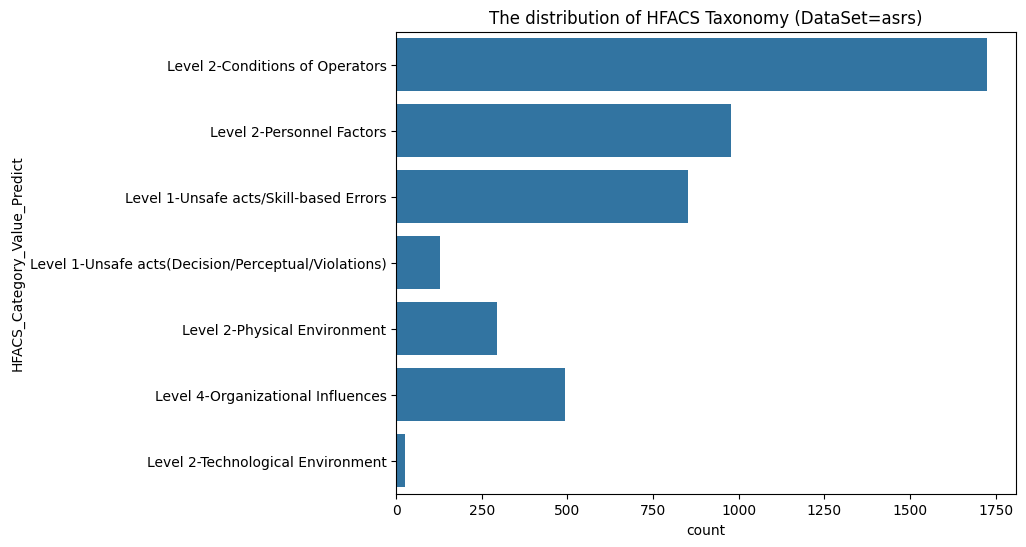

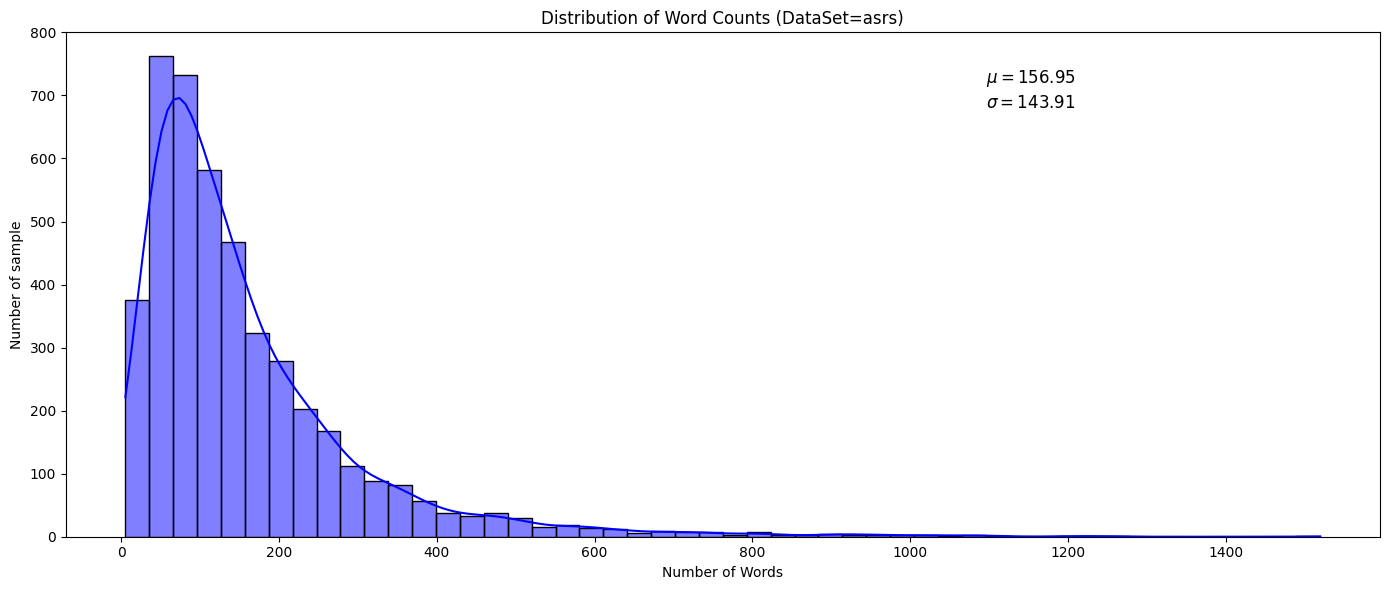

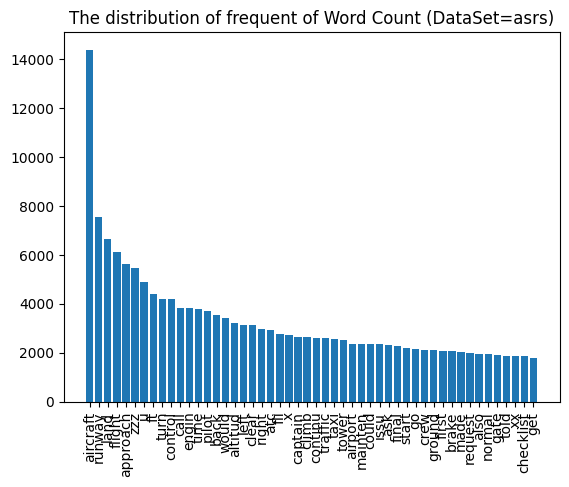

Total unique words: 17673
Define Y
Shape of label tensor: (4496,)
Define X
Found 17674 unique tokens.
Shape of data tensor: (4496, 200)
(3596, 200) (3596,)
(900, 200) (900,)
Counter({2: 1385, 3: 784, 1: 665, 6: 402, 4: 244, 0: 95, 5: 21})
Counter({2: 1385, 3: 784, 1: 665, 6: 402, 4: 244, 0: 95, 5: 21})
Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 36s 301ms/step - accuracy: 0.3085 - loss: 1.9012 - val_accuracy: 0.4639 - val_loss: 1.5184
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 33s 321ms/step - accuracy: 0.3735 - loss: 1.6012 - val_accuracy: 0.4639 - val_loss: 1.4989
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 33s 323ms/step - accuracy: 0.3736 - loss: 1.5963 - val_accuracy: 0.4639 - val_loss: 1.5237
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 34s 333ms/step - accuracy: 0.3819 - loss: 1.5877 - val_accuracy: 0.4639 - val_loss: 1.4977
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 294ms/step - accuracy: 0.3678 - loss: 1.5877 - val_accuracy: 0.4639 - val_loss: 1.4856
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step


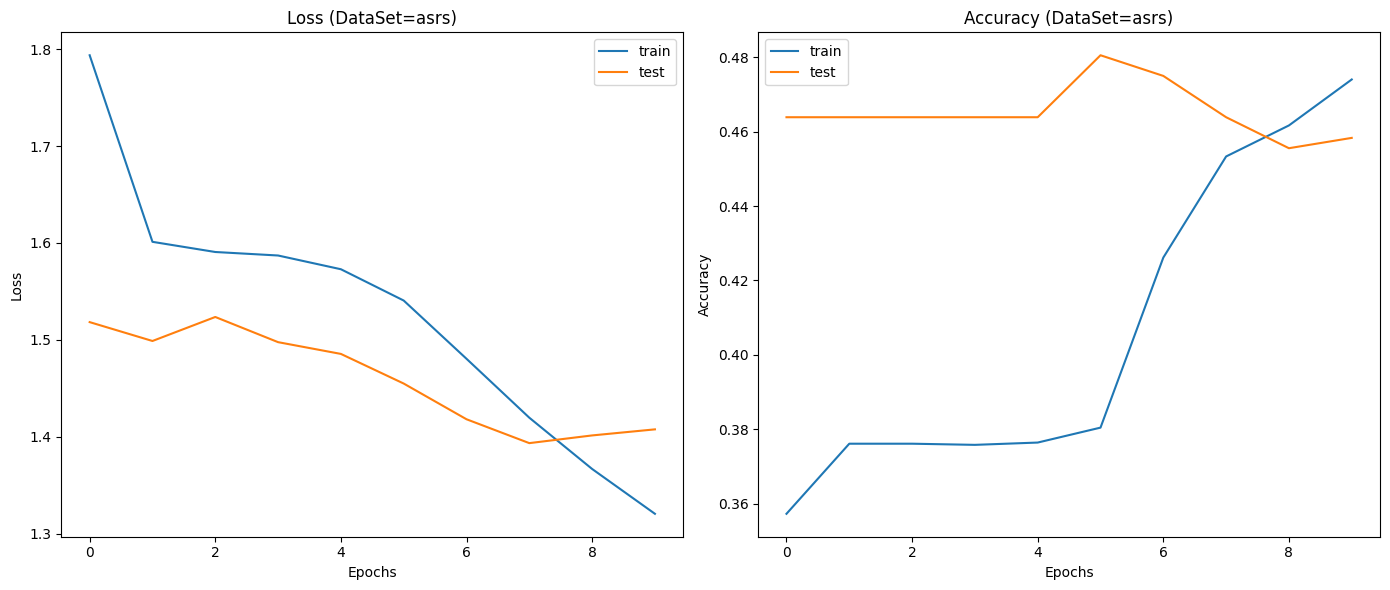

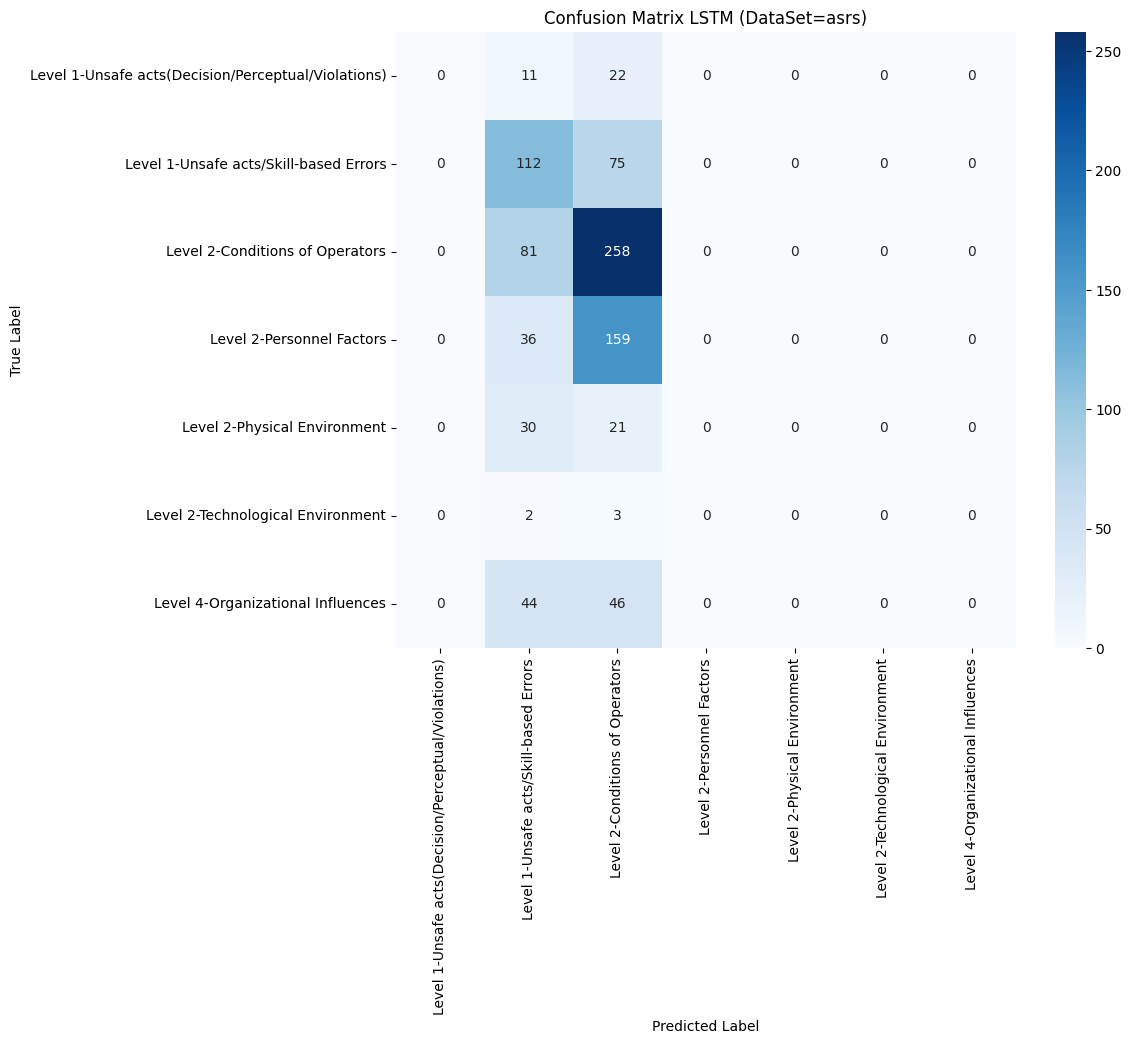

In [69]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_asasyn": False,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

lstm_model = call_modal(options)

## LSTM(ASRS) + LS(Hybrid) + Class Weight

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (4496, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


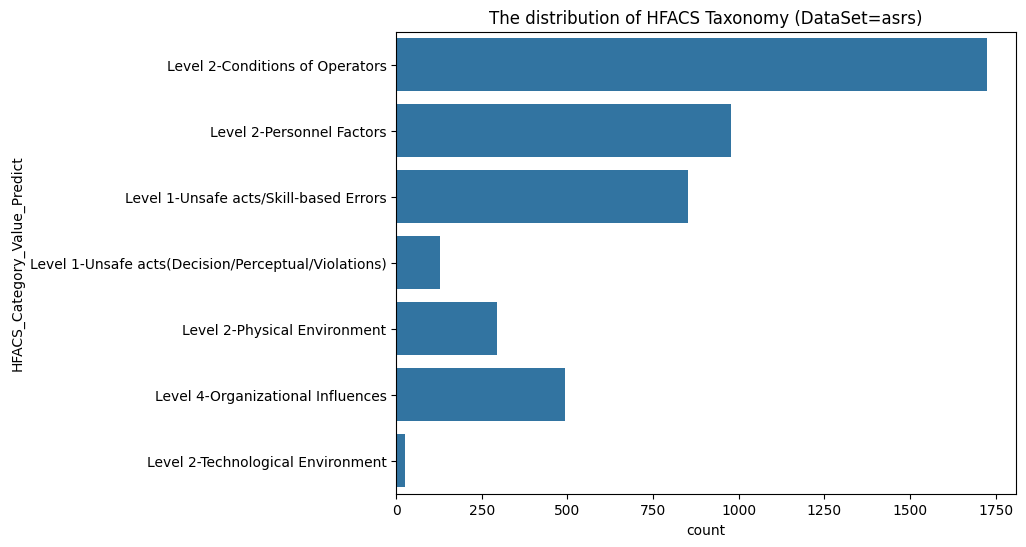

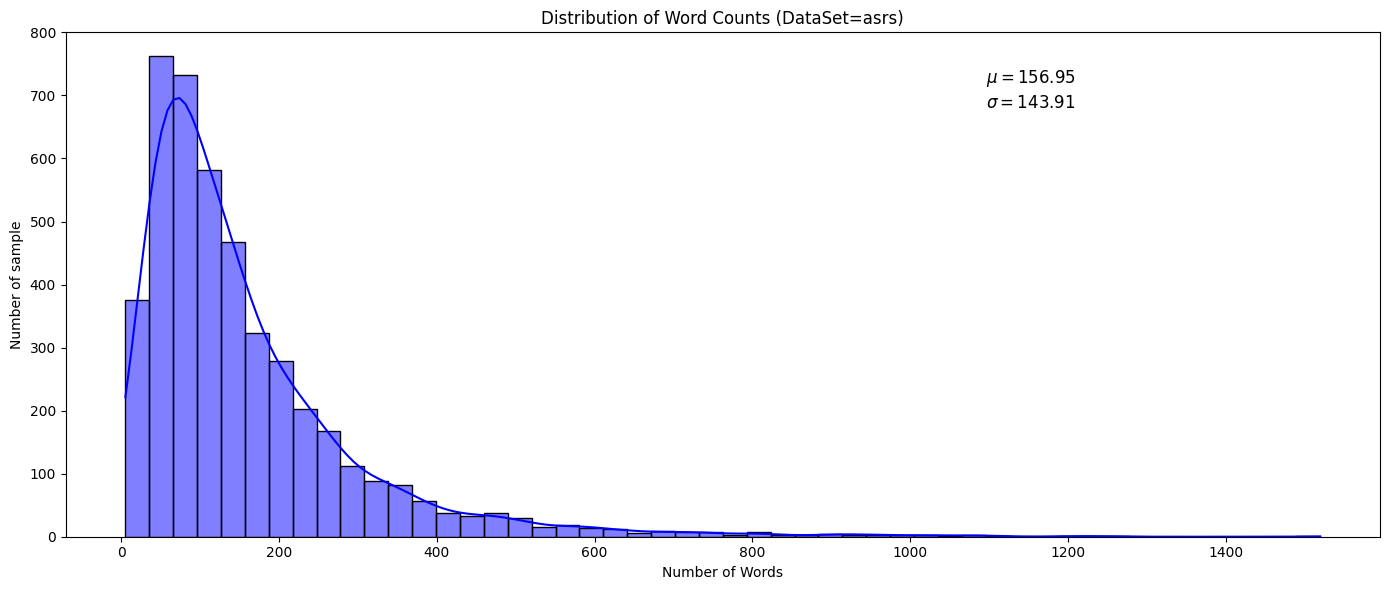

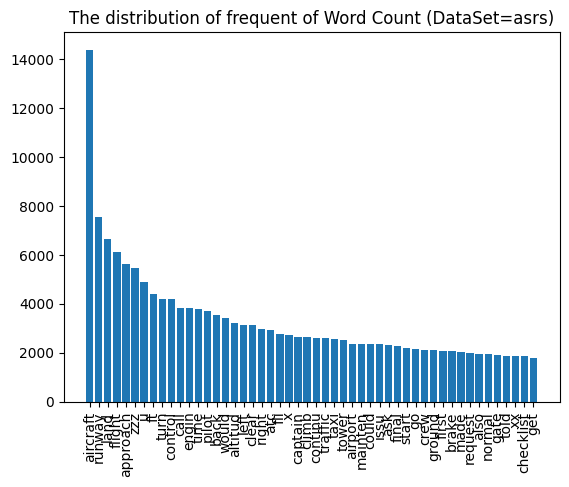

Total unique words: 17673
Define Y
Shape of label tensor: (4496,)
Define X
Found 17674 unique tokens.
Shape of data tensor: (4496, 200)
(3596, 200) (3596,)
(900, 200) (900,)
Counter({2: 1385, 3: 784, 1: 665, 6: 402, 4: 244, 0: 95, 5: 21})
Counter({2: 1385, 3: 784, 1: 665, 6: 402, 4: 244, 0: 95, 5: 21})
{0: 5.407518796992481, 1: 0.7725026852846402, 2: 0.3709128416709644, 3: 0.6552478134110787, 4: 2.1053864168618266, 5: 24.462585034013607, 6: 1.2778962331201138}
Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 37s 305ms/step - accuracy: 0.1796 - loss: 1.9021 - val_accuracy: 0.1806 - val_loss: 1.9567
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 38s 372ms/step - accuracy: 0.2046 - loss: 1.9675 - val_accuracy: 0.1333 - val_loss: 1.9579
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.1986 - loss: 1.9094 - val_accuracy: 0.1778 - val_loss: 1.9566
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.2003 - loss: 2.0233 - val_accuracy: 0.1750 - val_loss: 1.9349
Epoch 5/10


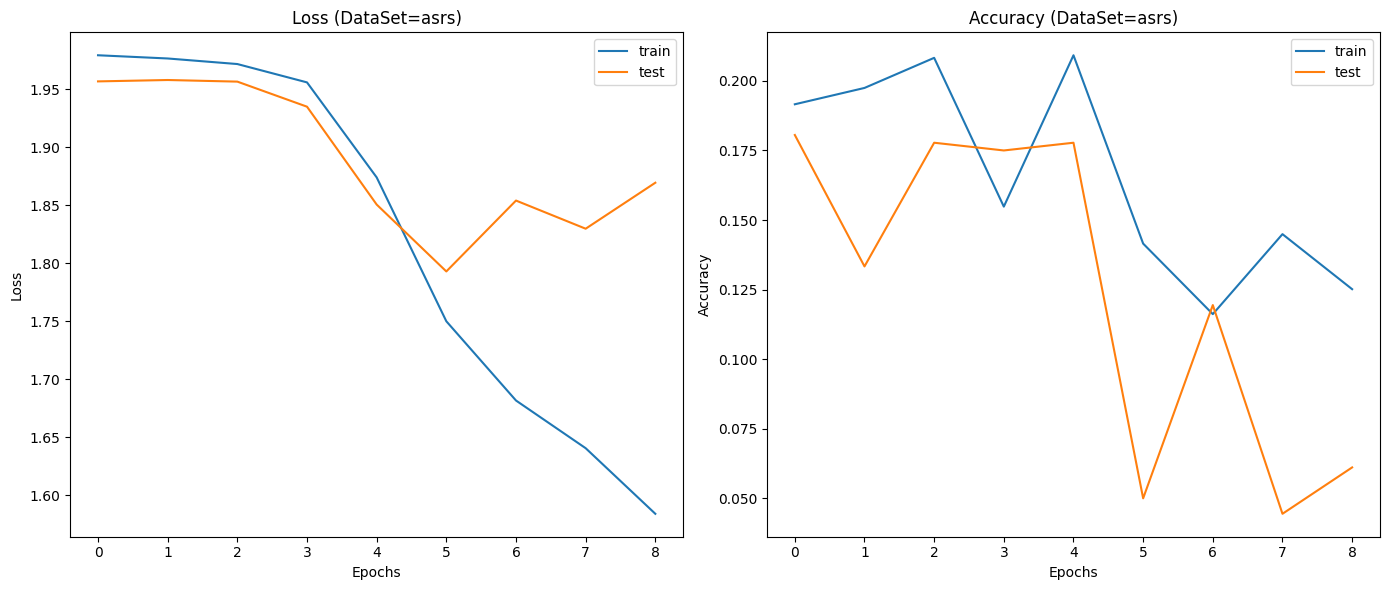

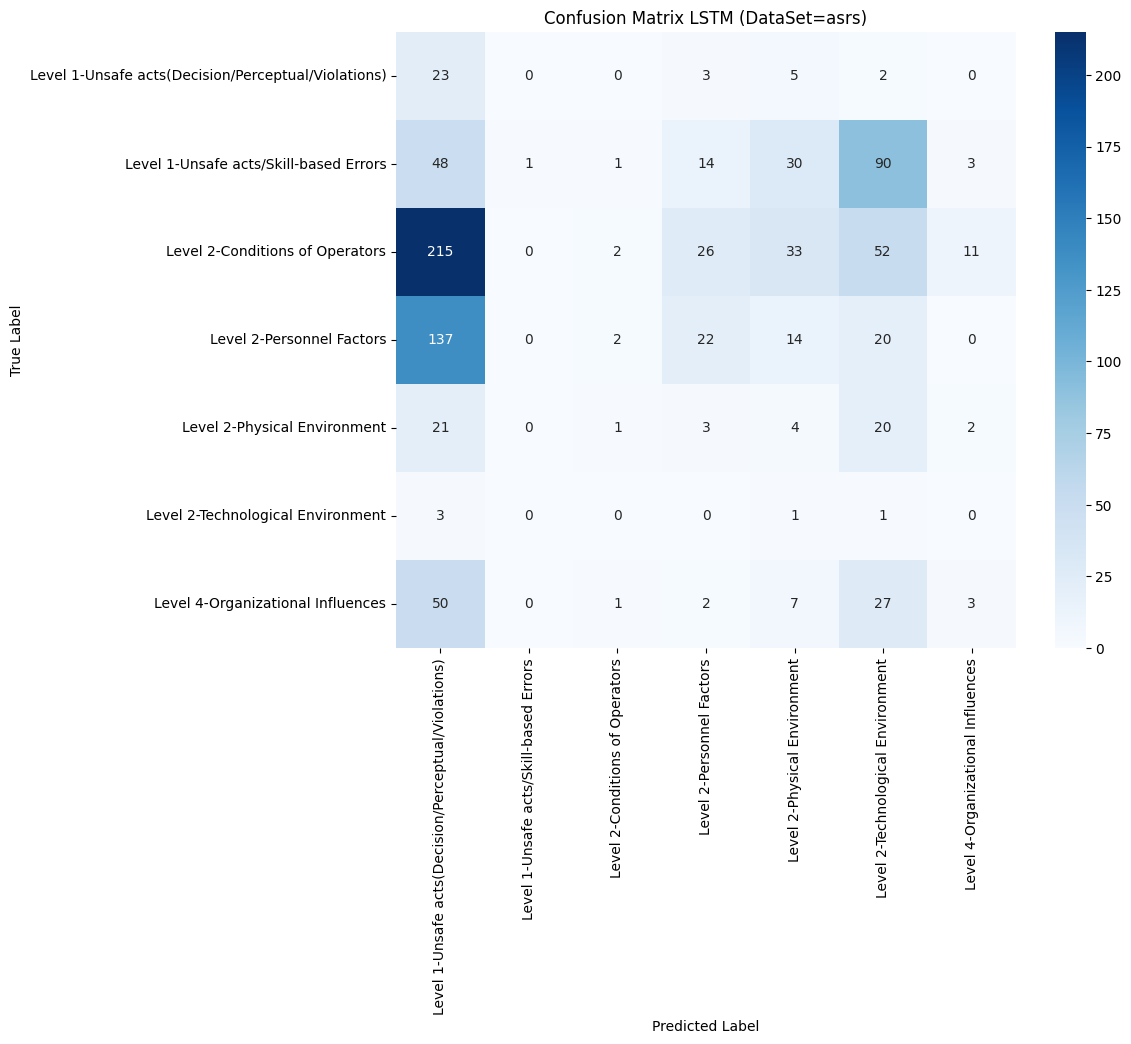

In [70]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_asasyn": False,
    "is_enable_class_weight": True,
    "ls_name": ls_name,
    "ls_version": ls_version
}

lstm_model_weight = call_modal(options)

## LSTM(ASRS) + LS(Hybrid) + SMOTE

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (4496, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


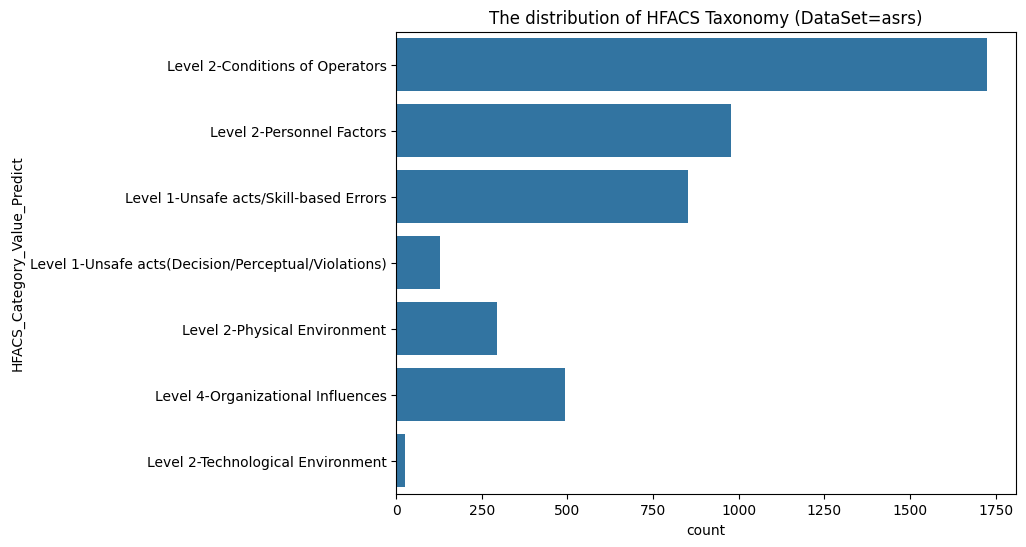

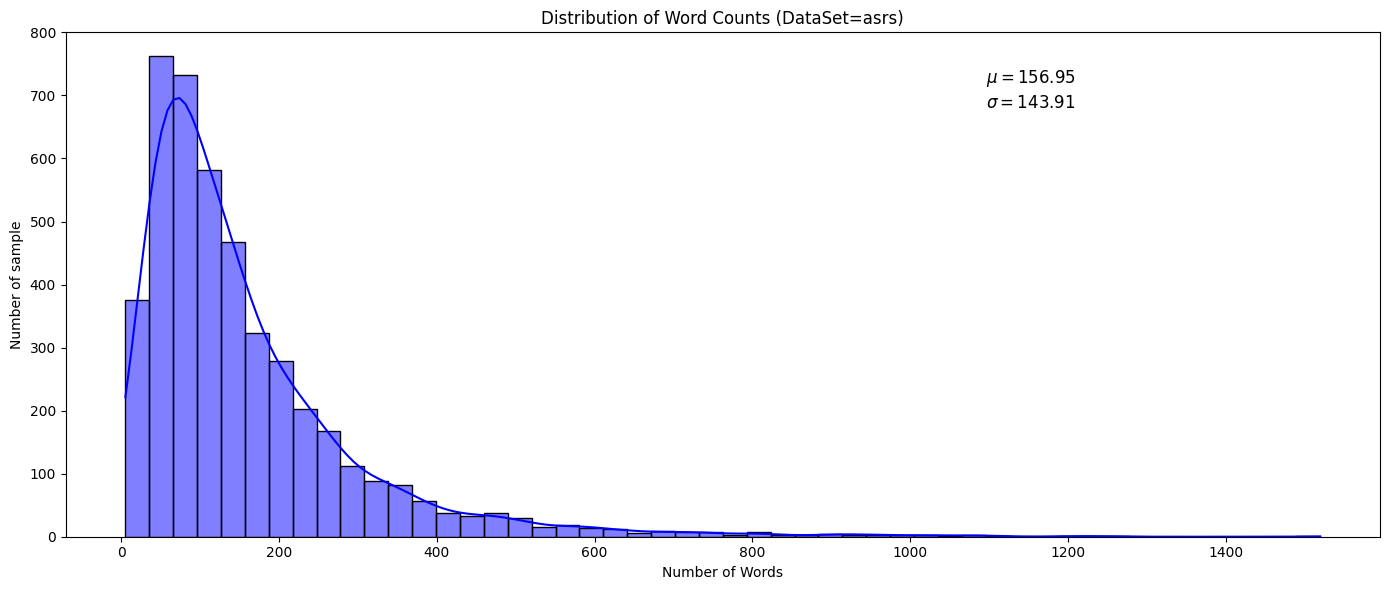

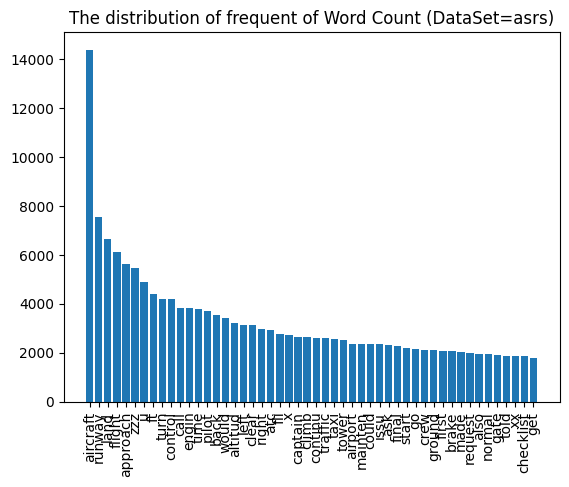

Total unique words: 17673
Define Y
Shape of label tensor: (4496,)
Define X
Found 17674 unique tokens.
Shape of data tensor: (4496, 200)
(3596, 200) (3596,)
(900, 200) (900,)
Counter({2: 1385, 3: 784, 1: 665, 6: 402, 4: 244, 0: 95, 5: 21})
Original dataset shape: (3596, 200)
Resampled dataset shape: (9695, 200)
Counter({2: 1385, 1: 1385, 6: 1385, 3: 1385, 4: 1385, 0: 1385, 5: 1385})
Epoch 1/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 81s 277ms/step - accuracy: 0.1667 - loss: 1.9425 - val_accuracy: 0.0000e+00 - val_loss: 3.1304
Epoch 2/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 83s 304ms/step - accuracy: 0.1688 - loss: 1.9082 - val_accuracy: 0.0000e+00 - val_loss: 3.5723
Epoch 3/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 127s 251ms/step - accuracy: 0.2428 - loss: 1.8189 - val_accuracy: 0.0000e+00 - val_loss: 3.8363
Epoch 4/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 71s 262ms/step - accuracy: 0.2841 - loss: 1.7255 - val_accuracy: 0.0000e+00 - val_loss: 4.1682
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step
Accuracy: 0.3089


/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step


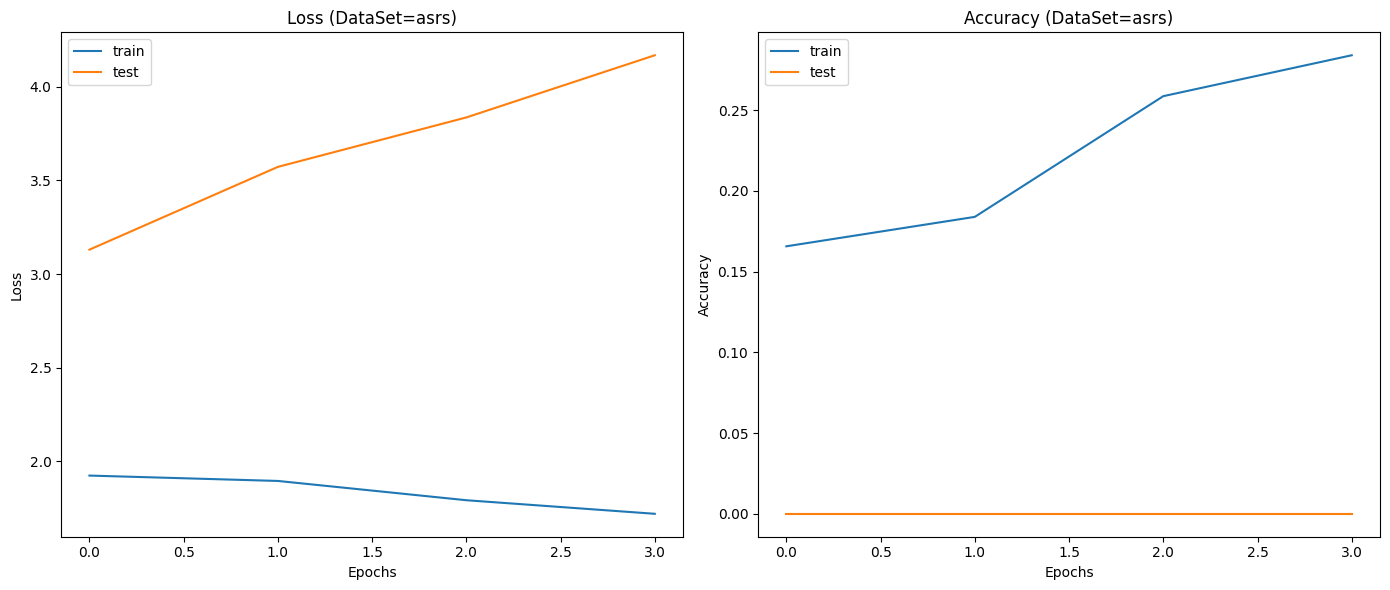

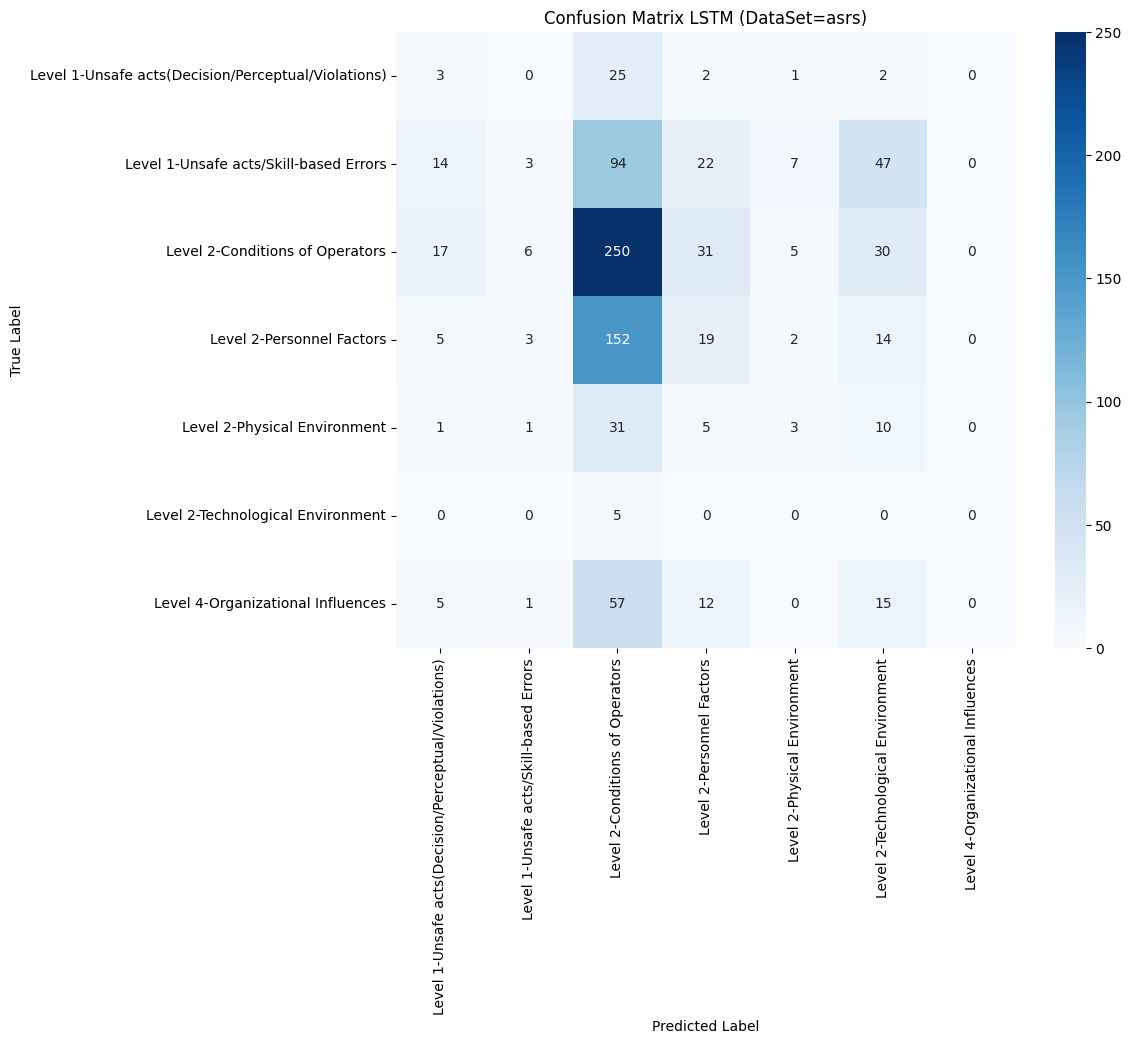

In [71]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": True,
    "is_enable_asasyn": False,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

lstm_model_smote = call_modal(options)

## LSTM(ASRS)+LS(Hybrid)+ASASYN

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (4496, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


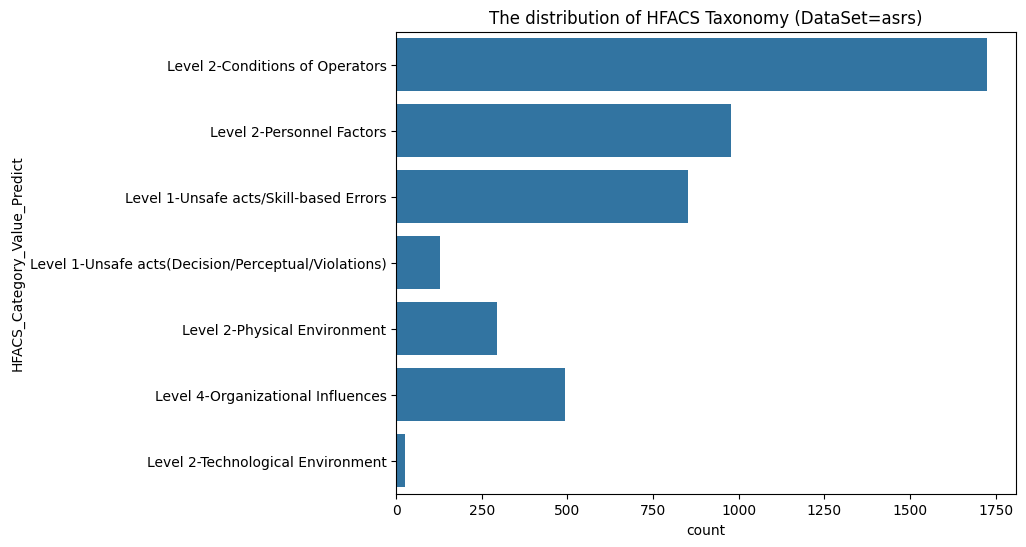

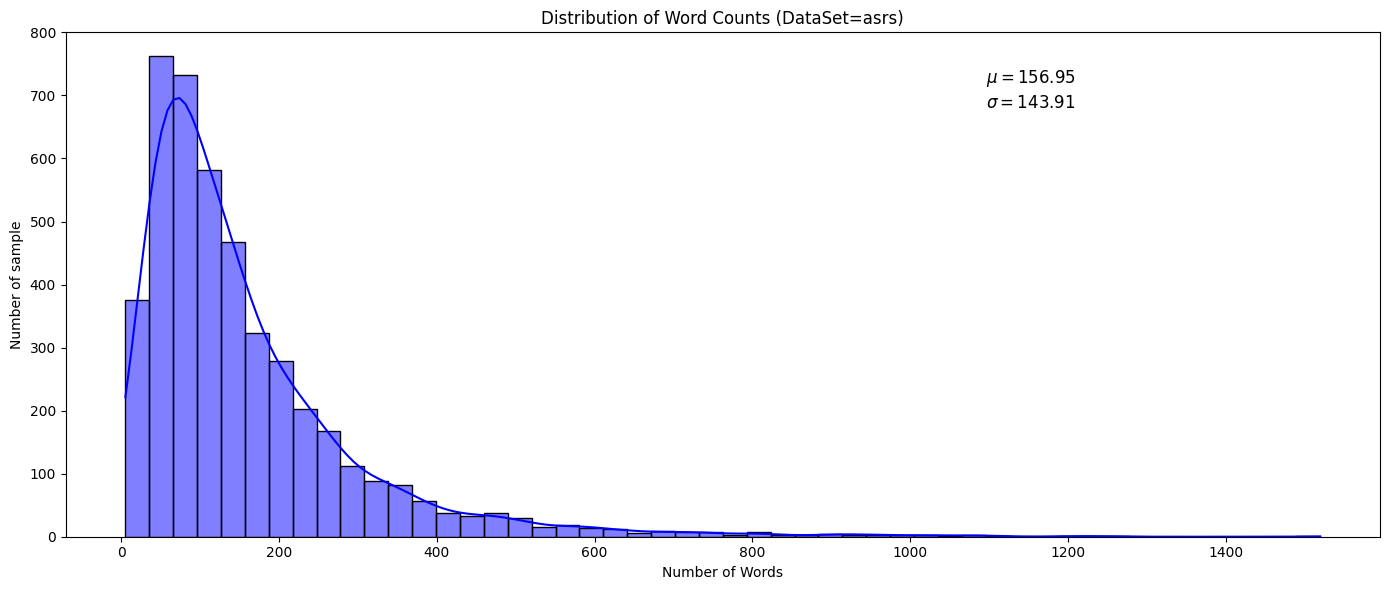

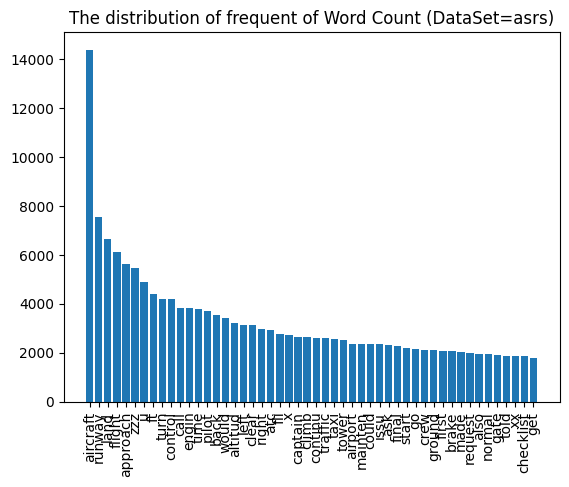

Total unique words: 17673
Define Y
Shape of label tensor: (4496,)
Define X
Found 17674 unique tokens.
Shape of data tensor: (4496, 200)
(3596, 200) (3596,)
(900, 200) (900,)
Counter({2: 1385, 3: 784, 1: 665, 6: 402, 4: 244, 0: 95, 5: 21})
Original dataset shape: (3596, 200)
Resampled dataset shape: (4961, 200)
Counter({5: 1386, 2: 1385, 3: 784, 1: 665, 6: 402, 4: 244, 0: 95})
Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 46s 260ms/step - accuracy: 0.2615 - loss: 1.9140 - val_accuracy: 0.0000e+00 - val_loss: 1.7183
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 37s 262ms/step - accuracy: 0.3092 - loss: 1.7495 - val_accuracy: 0.0000e+00 - val_loss: 1.5973
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 41s 292ms/step - accuracy: 0.3102 - loss: 1.7465 - val_accuracy: 0.0000e+00 - val_loss: 1.5920
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 39s 277ms/step - accuracy: 0.3000 - loss: 1.7336 - val_accuracy: 0.0000e+00 - val_loss: 1.5863
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 39s 281ms/step - accuracy: 0.3193 - loss:

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step


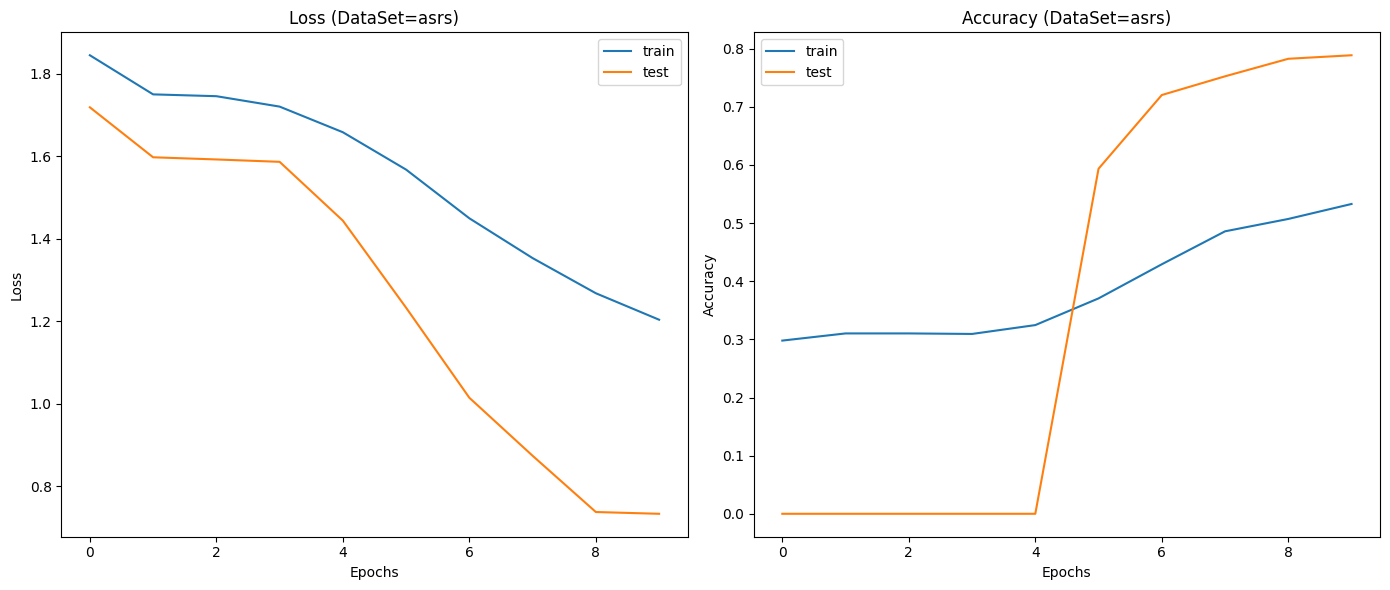

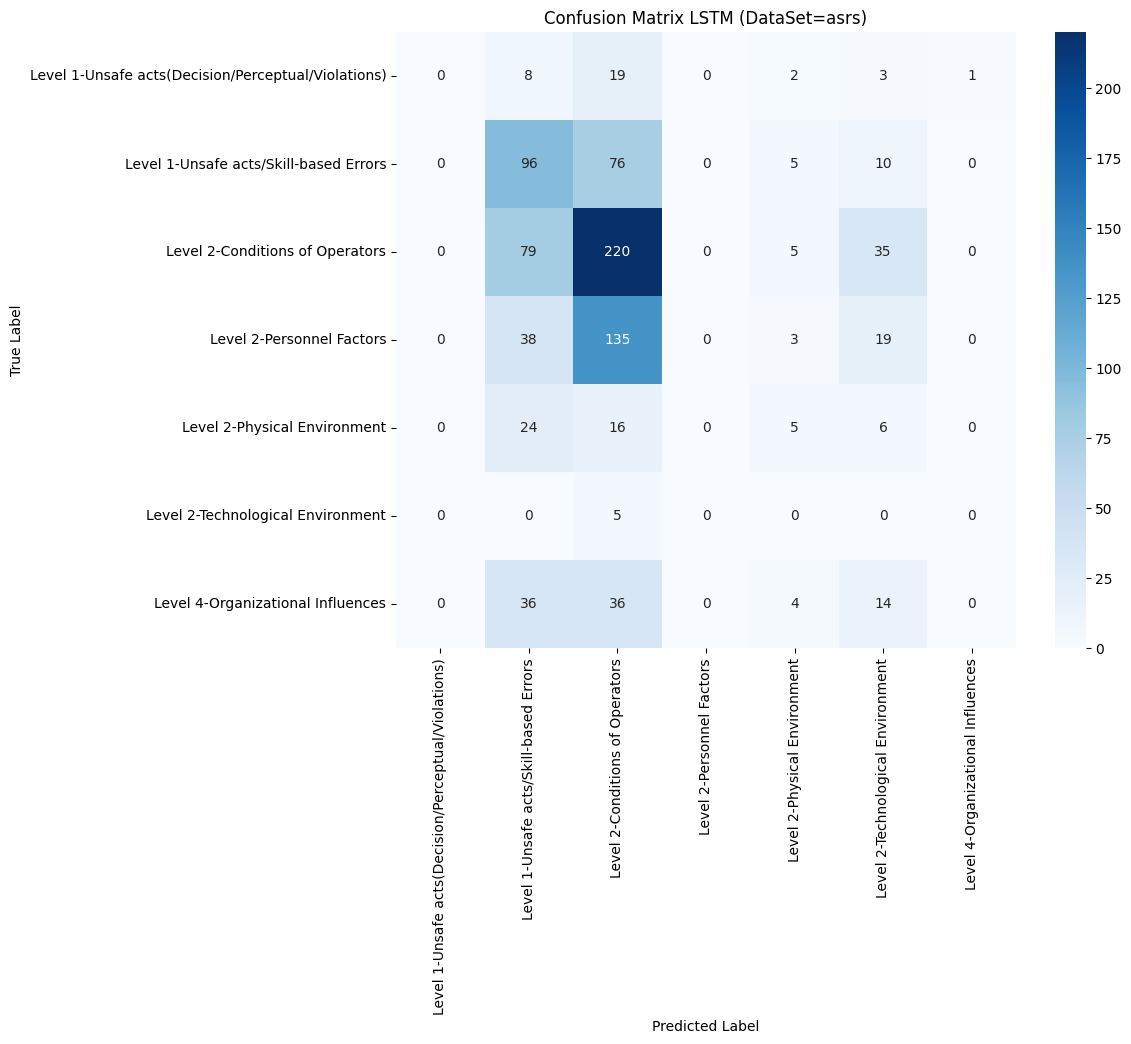

In [72]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "is_enable_asasyn": True,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 02. Train Model
lstm_model_asasyn = call_modal(options)

## Summary of Accuracy

In [73]:
# Show Accuracy
print('ASRS+LS(Hybrid)=========')
show_accuracy(lstm_model)
print('ASRS+LS(Hybrid)+Class Imbalance=========')
show_accuracy(lstm_model_weight)
print('ASRS+LS(Hybrid)+SMOTE=========')
show_accuracy(lstm_model_smote)
print('ASRS+LS(Hybrid)+ASAYN=========')
show_accuracy(lstm_model_asasyn)

ASRS+LS(Hybrid)=========
Accuracy: 41.11
Micro F1 Score: 41.11
Macro F1 Score: 14.35
Weighted F1 Score: 30.31
Hamming Loss: 0.5889
ASRS+LS(Hybrid)+Class Imbalance=========
Accuracy: 6.22
Micro F1 Score: 6.22
Macro F1 Score: 5.64
Weighted F1 Score: 5.44
Hamming Loss: 0.9378
ASRS+LS(Hybrid)+SMOTE=========
Accuracy: 30.89
Micro F1 Score: 30.89
Macro F1 Score: 12.16
Weighted F1 Score: 24.04
Hamming Loss: 0.6911
ASRS+LS(Hybrid)+ASAYN=========
Accuracy: 35.67
Micro F1 Score: 35.67
Macro F1 Score: 15.20
Weighted F1 Score: 28.87
Hamming Loss: 0.6433


In [74]:
# Show Accuracy
print('ASRS+LS(Hybrid)=========')
show_report(lstm_model)

ASRS+LS(Hybrid)=========
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.35      0.60      0.45       187
           2       0.44      0.76      0.56       339
           3       0.00      0.00      0.00       195
           4       0.00      0.00      0.00        51
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        90

    accuracy                           0.41       900
   macro avg       0.11      0.19      0.14       900
weighted avg       0.24      0.41      0.30       900



In [75]:
print('ASRS+LS(Hybrid)+Class Imbalance=========')
show_report(lstm_model_weight)

ASRS+LS(Hybrid)+Class Imbalance=========
              precision    recall  f1-score   support

           0       0.05      0.70      0.09        33
           1       1.00      0.01      0.01       187
           2       0.29      0.01      0.01       339
           3       0.31      0.11      0.17       195
           4       0.04      0.08      0.06        51
           5       0.00      0.20      0.01         5
           6       0.16      0.03      0.06        90

    accuracy                           0.06       900
   macro avg       0.26      0.16      0.06       900
weighted avg       0.40      0.06      0.05       900



In [76]:
print('ASRS+LS(Hybrid)+SMOTE=========')
show_report(lstm_model_smote)

ASRS+LS(Hybrid)+SMOTE=========
              precision    recall  f1-score   support

           0       0.07      0.09      0.08        33
           1       0.21      0.02      0.03       187
           2       0.41      0.74      0.52       339
           3       0.21      0.10      0.13       195
           4       0.17      0.06      0.09        51
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        90

    accuracy                           0.31       900
   macro avg       0.15      0.14      0.12       900
weighted avg       0.26      0.31      0.24       900



In [77]:
print('ASRS+LS(Hybrid)+ASAYN=========')
show_report(lstm_model_asasyn)

ASRS+LS(Hybrid)+ASAYN=========
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.34      0.51      0.41       187
           2       0.43      0.65      0.52       339
           3       0.00      0.00      0.00       195
           4       0.21      0.10      0.13        51
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        90

    accuracy                           0.36       900
   macro avg       0.14      0.18      0.15       900
weighted avg       0.25      0.36      0.29       900



## References

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html